# Exploratory Analysis and Data Manipulation

In this notebook, we will start by loading the data, cleaning and manipulating it to fit into our machine learning model, then performing some exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [4]:
# checking the loc1 column
df["loc1"].value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
S       1
T       1
Name: loc1, dtype: int64

In [5]:
#droping the S, T value rows from the dataframe
df = df[(df["loc1"].str.contains("S") == False) & (df["loc1"].str.contains("T") == False)]

In [6]:
#changing the datatypes of objects and droping the null values
df["loc2"] = pd.to_numeric(df["loc2"], errors='coerce')
df["loc1"] = pd.to_numeric(df["loc1"], errors='coerce')
df.dropna(inplace = True)

In [7]:
df.shape

(9993, 8)

In [8]:
# changing day of week string with numbers
days_of_week = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
df['dow'] = df['dow'].map(days_of_week)
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1.0,1,1,662,3000.0,3.8,73.49
1,9,99.0,1,4,340,2760.0,9.2,300.00
2,0,4.0,0,1,16,2700.0,3.0,130.00
3,4,40.0,1,1,17,12320.0,6.4,365.00
4,5,50.0,1,4,610,2117.0,10.8,357.50


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    9993 non-null   int64  
 1   loc2    9993 non-null   float64
 2   para1   9993 non-null   int64  
 3   dow     9993 non-null   int64  
 4   para2   9993 non-null   int64  
 5   para3   9993 non-null   float64
 6   para4   9993 non-null   float64
 7   price   9993 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 702.6 KB


In [38]:
df.to_csv('cleaned_dataset.csv', index=False)

## Exploratory Data Analysis

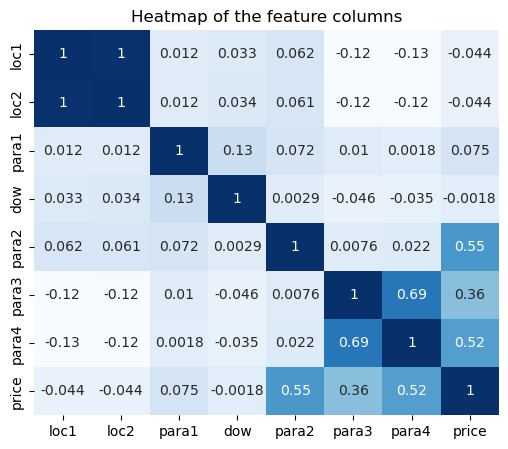

In [10]:
# Co-relation map of the columns 
corr_of_key_fields = df.corr()
plt.figure(figsize=(6,5))
plt.title("Heatmap of the feature columns")
yticklabel=False
sns.heatmap(corr_of_key_fields, annot=True,cmap='Blues', cbar=False);

The columns para2, para4, para3, para1 are closely related to the price

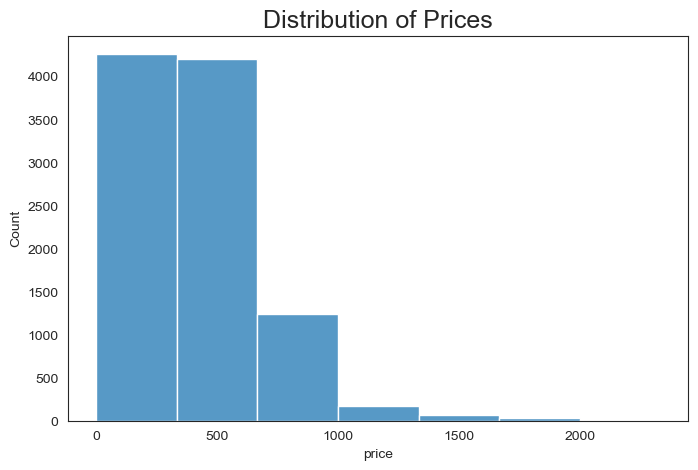

In [11]:
# Price Distribution in tha dataset
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5))
bins = [i * 5000 / 15 for i in range(8)]
sns.histplot(df,
             x='price',
             bins=bins)
ax.set_title('Distribution of Prices', fontsize=18);

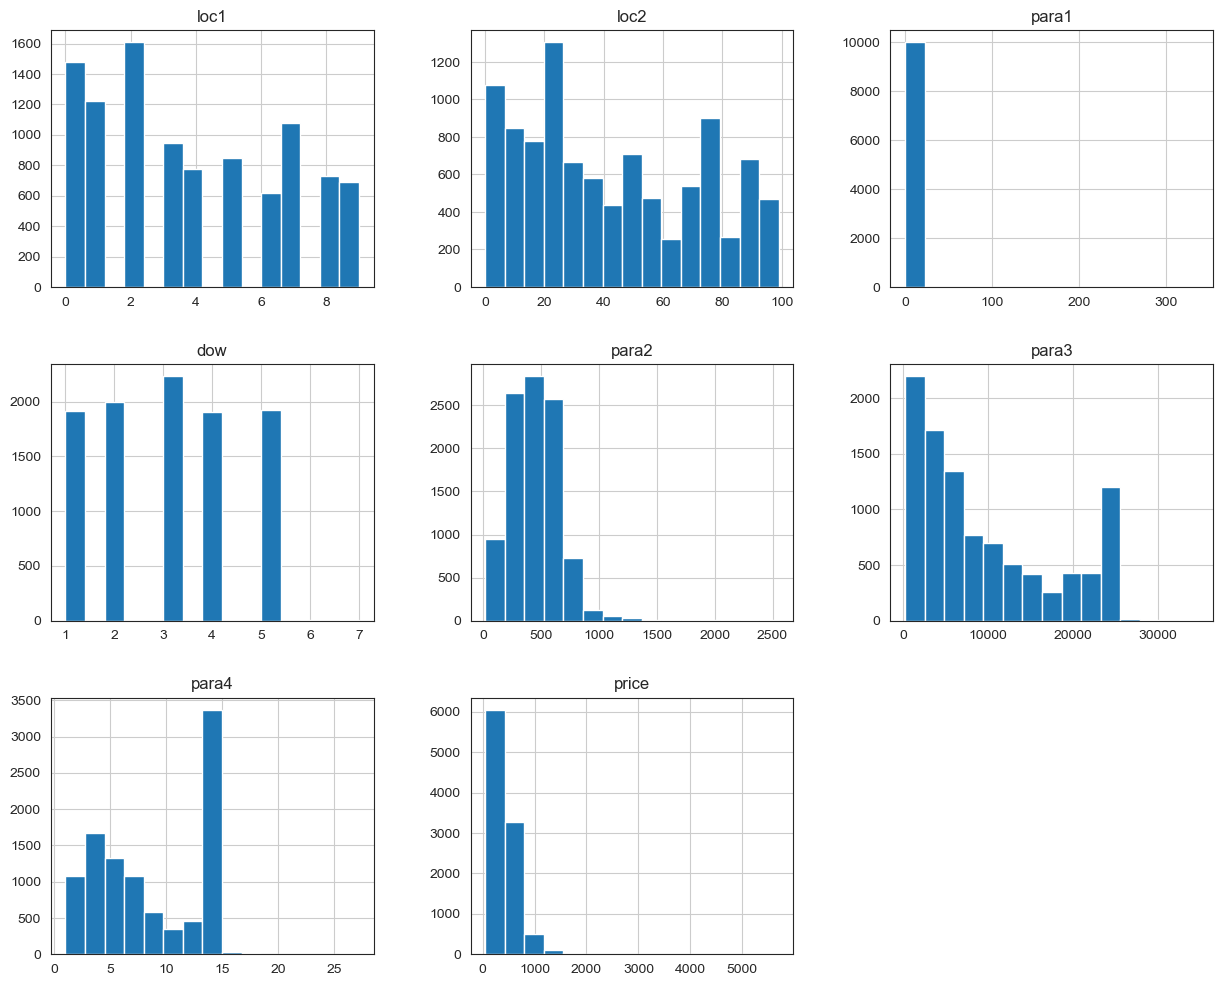

In [13]:
#checking the histogram distribution of the whole dataset
df.hist(figsize=(15,12),bins = 15)
plt.show();

In [15]:
# descriptive- statistics
df.describe()

,loc1,loc2,para1,dow,para2,para3,para4,price
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,3.793355,42.468028,1.379966,2.997498,446.888522,9550.105894,8.460614,433.318379
std,2.892286,29.350079,3.501891,1.393933,220.141080,8022.655794,4.613156,276.743453
min,0.000000,0.000000,0.000000,1.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,16.000000,1.000000,2.000000,301.000000,2900.000000,4.000000,250.000000
50%,3.000000,37.000000,1.000000,3.000000,434.000000,6448.000000,7.200000,370.000000
75%,6.000000,69.000000,1.000000,4.000000,582.000000,15000.000000,13.600000,550.000000
max,9.000000,99.000000,337.000000,7.000000,2554.000000,34782.000000,27.200000,5700.000000


- 75% of the prices in the dataset falls with 550